In [49]:
# importing LIbarries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import statistics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [2]:
# import warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read the data
x_train=pd.read_csv("train_LZdllcl.csv")
x_test=pd.read_csv("test_2umaH9m.csv")

# Data Inspection

<h3>Train data Analysis</h3>

In [4]:
# Displaying first 3 rows
x_train.head(3)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0


In [5]:
#displaying last 3 rows
x_train.tail(3)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0
54807,51526,HR,region_22,Bachelor's,m,other,1,27,1.0,5,0,0,49,0


In [6]:
#shape of the train set
x_train.shape

(54808, 14)

In [7]:
# Checking the feature details
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [8]:
# statistics of the data
x_train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [9]:
x_train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

<h3>Test data Analysis</h3>

In [10]:
#displaying First 3 rows of x_test value
x_test.head(3)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47


In [11]:
#displaying last 3 rows
x_test.tail(3)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70
23489,5973,Technology,region_17,Master's & above,m,other,3,40,5.0,5,1,0,89


In [12]:
#shape of the test set
x_test.shape

(23490, 13)

In [13]:
# Checking the feature details
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [14]:
# statistics of the test data
x_test.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,23490.000000,23490.000000,23490.000000,21678.000000,23490.000000,23490.000000,23490.000000,23490.000000
mean,39041.399149,1.254236,34.782929,3.339146,5.810387,0.358834,0.022776,63.263133
std,22640.809201,0.600910,7.679492,1.263294,4.207917,0.479668,0.149191,13.411750
min,3.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,19370.250000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,38963.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,58690.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000
max,78295.000000,9.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000


In [15]:
x_test.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score'],
      dtype='object')

# Data Cleaning & Pre-Processing

<h2>Checking & Handling of null values in the train set</h2>

In [16]:
#splitting the y_train data
#x_train=x_train.drop("is_promoted",axis=1)
#y_train=x_train.iloc[:,-1]

In [17]:
x_train.shape

(54808, 14)

In [18]:
#check for the null values in train & test data
x_train.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [19]:
x_train.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [20]:
# creating a function to handle the missing values based on type of the column
def get_parameters(data):
    parameter={}
    for i in data.columns[data.isnull().any()]:
        if data[i].dtype=="int64" or data[i].dtype=="float64":
            strategy='median'
        else:
             strategy='most_frequent'
        missing_values=data[i][data[i].isnull()].values[0]
        parameter[i]={"missing_values":missing_values,"strategy":strategy}
    return parameter

In [21]:
get_parameters(x_train)

{'education': {'missing_values': nan, 'strategy': 'most_frequent'},
 'previous_year_rating': {'missing_values': nan, 'strategy': 'median'}}

In [22]:
get_parameters(x_test)

{'education': {'missing_values': nan, 'strategy': 'most_frequent'},
 'previous_year_rating': {'missing_values': nan, 'strategy': 'median'}}

In [23]:
# fill the null values using Imputer in train set
parameters=get_parameters(x_train)
for col,param in parameters.items():
    missing_values=param["missing_values"]
    strategy=param["strategy"]
    imp=SimpleImputer(missing_values=missing_values,strategy=strategy)
    x_train[col]=imp.fit_transform(x_train[[col]])
x_train.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [24]:
# fill the null values using Imputer in test set
parameters=get_parameters(x_test)
for col,param in parameters.items():
    missing_values=param["missing_values"]
    strategy=param["strategy"]
    imp=SimpleImputer(missing_values=missing_values,strategy=strategy)
    x_test[col]=imp.fit_transform(x_test[[col]])
x_test.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

# Check for the Outliers in the train & test data

In [25]:
# Checking & Handling of outliers in the train set

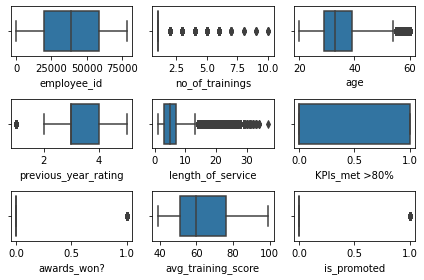

In [26]:
#Boxplot view of the train set
train_num=x_train.select_dtypes(exclude="object")
cols=train_num.columns

for i in enumerate(cols):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x=i[1], data=train_num)
    plt.tight_layout()

In [27]:
# IQR methos of Handling outliers in continuos numeric columns
cols=['age','length_of_service']
for i in cols:
    Q1=np.percentile(x_train[i],25,interpolation='midpoint')
    Q3=np.percentile(x_train[i],75,interpolation='midpoint')
    IQR=Q3-Q1
    up_lim=Q3+(1.5* IQR)
    low_lim=Q1-(1.5* IQR)
    
    x_train[i] = np.where(x_train[i]>up_lim,up_lim,np.where(x_train[i]<low_lim,low_lim,x_train[i]))
train_cols=x_train.columns

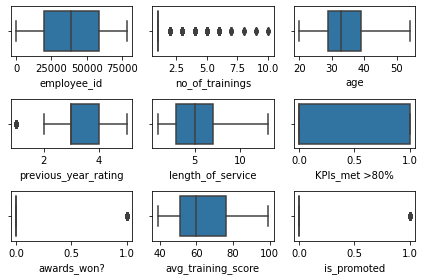

In [28]:
train_num=x_train.select_dtypes(exclude="object")
cols=train_num.columns

for i in enumerate(cols):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x=i[1], data=train_num)
    plt.tight_layout()

In [29]:
# Checking & Handling of outliers in the test set

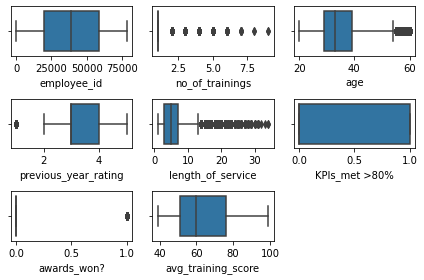

In [30]:
#Boxplot view of the test set
test_num=x_test.select_dtypes(exclude="object")
cols=test_num.columns

for i in enumerate(cols):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x=i[1], data=test_num)
    plt.tight_layout()

In [31]:
cols=['age','length_of_service']
for i in cols:
    Q1=np.percentile(x_test[i],25,interpolation='midpoint')
    Q3=np.percentile(x_test[i],75,interpolation='midpoint')
    IQR=Q3-Q1
    up_lim=Q3+(1.5* IQR)
    low_lim=Q1-(1.5* IQR)
    
    x_test[i] = np.where(x_test[i]>up_lim,up_lim,np.where(x_test[i]<low_lim,low_lim,x_test[i]))
test_cols=x_test.columns

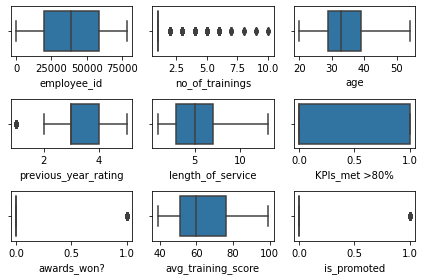

In [32]:
train_num=x_train.select_dtypes(exclude="object")
cols=train_num.columns

for i in enumerate(cols):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x=i[1], data=train_num)
    plt.tight_layout()

# Exploratory Data Analysis

<AxesSubplot:title={'center':'Length of Servive vs promotation '}, xlabel='length_of_service', ylabel='count'>

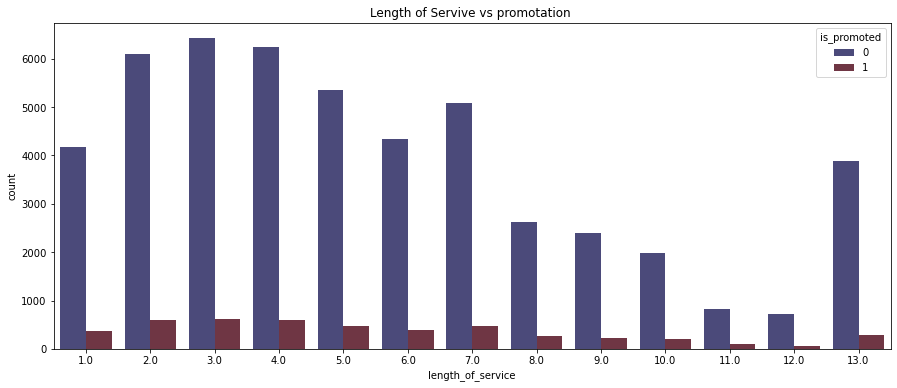

In [33]:
#Length of Servive vs promotation
plt.figure(figsize=(15,6))
plt.title("Length of Servive vs promotation ")
sns.countplot(x=x_train["length_of_service"],hue=x_train['is_promoted'],palette='icefire')

Insight:</br>
    we can see that promotion is high during the service period of 2 to 5 yeras

<AxesSubplot:title={'center':'Distribution of age of the employees'}>

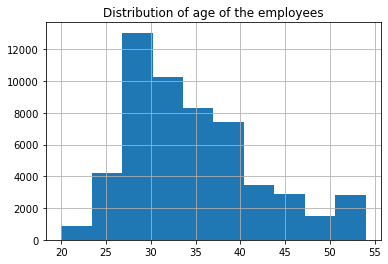

In [34]:
#  Distribution of age of the employees
plt.title("Distribution of age of the employees")
x_train['age'].hist()

Insight:
    Most of the staff's are aged between 27-40

In [35]:
x_train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

<AxesSubplot:title={'center':'Gender vs promotation '}, xlabel='gender', ylabel='count'>

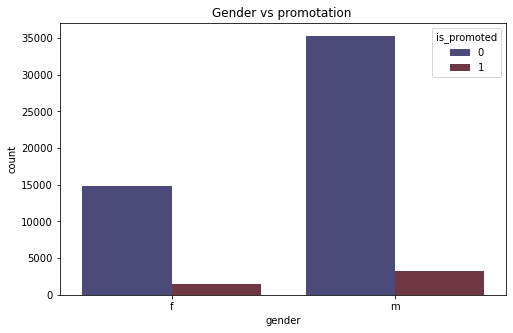

In [36]:
['region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted']

#Gender vs promotation
plt.figure(figsize=(8,5))
plt.title("Gender vs promotation ")
sns.countplot(x=x_train["gender"],hue=x_train['is_promoted'],palette='icefire')

Insight:Chances of Promotion is higher for Males, compared to females

<AxesSubplot:title={'center':'recruitment_channel vs promotation '}, xlabel='recruitment_channel', ylabel='count'>

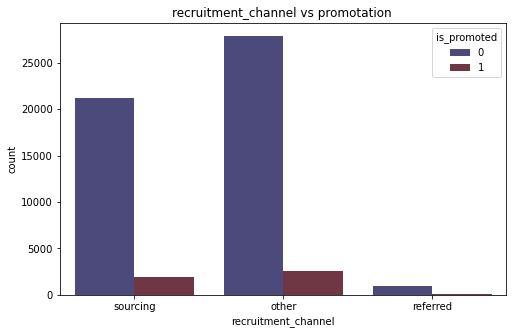

In [37]:
#Gender vs promotation
plt.figure(figsize=(8,5))
plt.title("recruitment_channel vs promotation ")
sns.countplot(x=x_train["recruitment_channel"],hue=x_train['is_promoted'],palette='icefire')

Insight:Chances of Promotion is lower for those who are employed by referral

<AxesSubplot:xlabel='KPIs_met >80%', ylabel='count'>

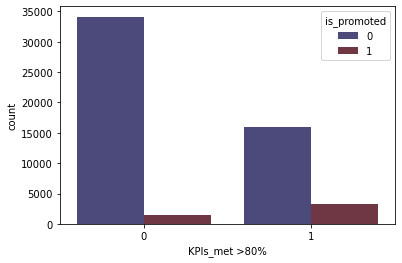

In [38]:
sns.countplot(x='KPIs_met >80%',hue='is_promoted',palette='icefire',data=x_train)

Insight:</br>
    From the above graph we can see that the chances of getting promoted is high for those who have achieved their targets 

# Label Encoding

In [39]:
x_cat=x_train.select_dtypes(include="object")
x_cat_col=x_cat.columns
x_cat_col
for i in x_cat_col:
    print(i,":",x_train[i].unique(),"\n")

department : ['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal'] 

region : ['region_7' 'region_22' 'region_19' 'region_23' 'region_26' 'region_2'
 'region_20' 'region_34' 'region_1' 'region_4' 'region_29' 'region_31'
 'region_15' 'region_14' 'region_11' 'region_5' 'region_28' 'region_17'
 'region_13' 'region_16' 'region_25' 'region_10' 'region_27' 'region_30'
 'region_12' 'region_21' 'region_8' 'region_32' 'region_6' 'region_33'
 'region_24' 'region_3' 'region_9' 'region_18'] 

education : ["Master's & above" "Bachelor's" 'Below Secondary'] 

gender : ['f' 'm'] 

recruitment_channel : ['sourcing' 'other' 'referred'] 



In [40]:
#Label encoding of Categorical features in train & Test set
#x_train=x_train.drop("is_promoted",axis=1)
#y_train=x_train.iloc[:,-1]
lbl=LabelEncoder()

In [41]:
for i in x_cat_col:
    x_train[i]=lbl.fit_transform(x_train[i])
    x_test[i]=lbl.fit_transform(x_test[i])
x_train.head() 

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,7,31,2,0,2,1,35.0,5.0,8.0,1,0,49,0
1,65141,4,14,0,1,0,1,30.0,5.0,4.0,0,0,60,0
2,7513,7,10,0,1,2,1,34.0,3.0,7.0,0,0,50,0
3,2542,7,15,0,1,0,2,39.0,1.0,10.0,0,0,50,0
4,48945,8,18,0,1,0,1,45.0,3.0,2.0,0,0,73,0


# Feature Reduction

<AxesSubplot:>

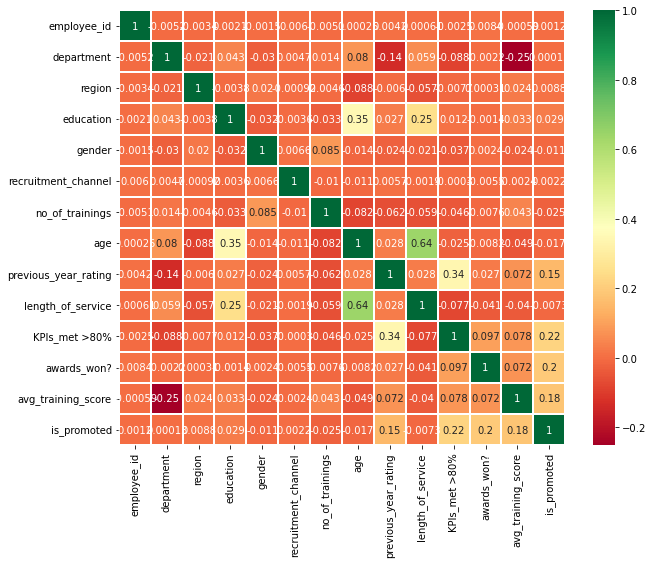

In [42]:
corrmatrix=x_train.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corrmatrix,linewidths=0.2,cmap="RdYlGn",annot=True)

Insight:There is no High positiva & Negative correlation in the dataset

# Feature Selection

In [44]:
# Feature importance using Random Forest Classifier
y_train=x_train["is_promoted"]
x_train=x_train.drop("is_promoted",axis=1)
rdm=RandomForestClassifier()
rdm.fit(x_train,y_train)
feat_importances=pd.Series(rdm.feature_importances_,index=x_train.columns).sort_values(ascending=False)*100
feat_importances

avg_training_score      25.297422
employee_id             17.873118
age                     10.725193
region                   9.317369
department               8.439149
length_of_service        7.908662
previous_year_rating     4.829702
KPIs_met >80%            4.685973
awards_won?              3.014515
recruitment_channel      2.559920
gender                   2.034860
no_of_trainings          2.019687
education                1.294430
dtype: float64

In [45]:
# Drop the columns having low feature importance
x_train.drop(["education","gender","no_of_trainings"], axis=1, inplace=True)
x_test.drop(["education","gender","no_of_trainings"], axis=1, inplace=True)

In [46]:
x_train.head()

,employee_id,department,region,recruitment_channel,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,65438,7,31,2,35.0,5.0,8.0,1,0,49
1,65141,4,14,0,30.0,5.0,4.0,0,0,60
2,7513,7,10,2,34.0,3.0,7.0,0,0,50
3,2542,7,15,0,39.0,1.0,10.0,0,0,50
4,48945,8,18,0,45.0,3.0,2.0,0,0,73


# Feature SCaling

In [50]:
std=StandardScaler()
x_train=std.fit_transform(x_train)
x_test=std.transform(x_test)

# Modeling

Text(0.5, 1.0, 'Accuracy for differnet K value')

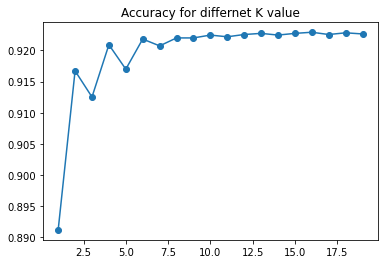

In [51]:
# Finding the best vaue of n_neighbors in KNN
n_nghbr=[]
lim=np.arange(1,20)

# y_train=x_train["is_promoted"]
# x_train=x_train.drop("is_promoted",axis=1)

#Splitting the train set further to check the model f1 score
x_train_ref,x_test_ref,y_train_ref,y_test_ref=train_test_split(x_train,y_train,test_size=0.2,random_state=42)

for i in lim:
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_ref,y_train_ref)
    y_pred=knn.predict(x_test_ref)
    acc=accuracy_score(y_test_ref,y_pred)
    n_nghbr.append(acc)
plt.plot(lim,n_nghbr,'-o')
plt.title("Accuracy for differnet K value")

We will take n_neighbors for KNN as 10

In [52]:
# since its is Classification data, We can gor for Classifier algorithms
Model={
    'Logistic Regression':LogisticRegression(),
    'KNN Classifier':KNeighborsClassifier(n_neighbors=10, metric="minkowski"),
    'Random Forest Classifier':RandomForestClassifier(),
    'Decision Tree Classifier':DecisionTreeClassifier(),
    'Gradient Boosting Classifier':GradientBoostingClassifier(),
    'support vector': SVC(),
    'BernoulliNB':BernoulliNB()   
}

In [53]:
result={}

for name,model in Model.items():
    model.fit(x_train_ref,y_train_ref)
    y_pred_ref=model.predict(x_test_ref)
    f1score=f1_score(y_test_ref,y_pred_ref,average='micro')
    result[name]=f1score

In [ ]:
result

Note: by looking into the f1 score, we can choose Randoem Forest classifier for Modeling

In [480]:
rdm_for=RandomForestClassifier()
rdm_for.fit(x_train,y_train)
y_pred=rdm_for.predict(x_test)

In [481]:
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [482]:
prediction = pd.DataFrame(y_pred, columns=['is_promoted'])

In [484]:
prediction.to_csv('C:/Users/raseena.ppallintakat/Desktop/Raseena/RASEENA- Work File/My Docs/Python-My Excercise/ICT/Analytics-Vidhya/sample_submission_new.csv')
#C:/Users/raseena.ppallintakat/Desktop/Raseena/RASEENA- Work File/My Docs/Python-My Excercise/ICT/Analytics-Vidhya
